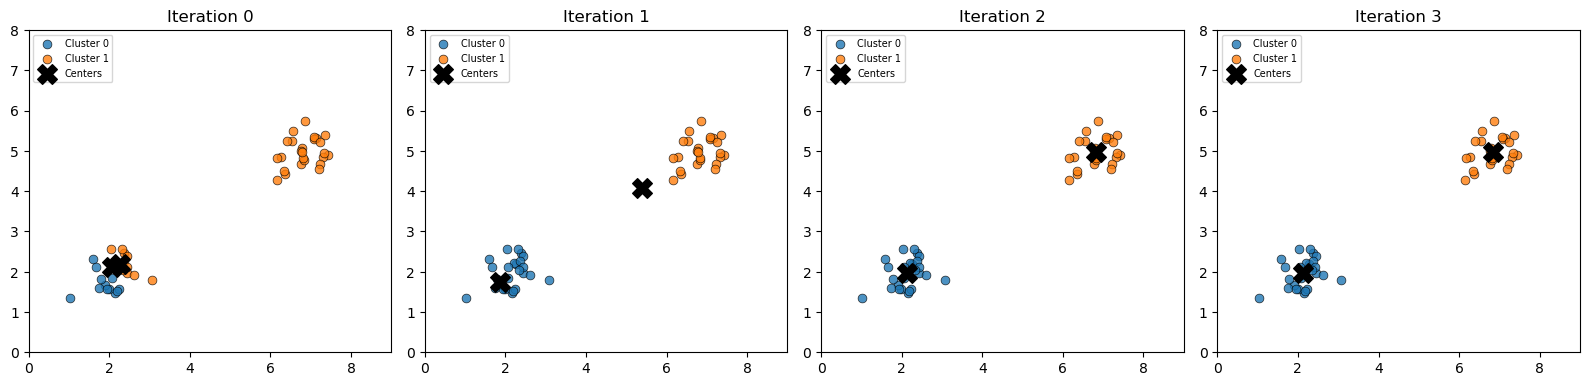

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Generate example data (more samples)
# -----------------------------
rng = np.random.default_rng(42)

# Two clusters: one around (2, 2), another around (7, 5)
cluster_1 = rng.normal(loc=[2, 2], scale=0.5, size=(25, 2))
cluster_2 = rng.normal(loc=[7, 5], scale=0.5, size=(25, 2))
points = np.vstack((cluster_1, cluster_2))

K = 2  # number of clusters

# -----------------------------
# 2. Initialize cluster centers
# -----------------------------
initial_idx = rng.choice(len(points), size=K, replace=False)
centers = points[initial_idx].copy()

history = []

def assign_points(points, centers):
    """Assign each point to its nearest cluster center."""
    dists = np.linalg.norm(points[:, None, :] - centers[None, :, :], axis=2)
    return np.argmin(dists, axis=1)

def recompute_centers(points, labels, old_centers, K):
    """Recompute cluster centers as means of assigned points."""
    new_centers = old_centers.copy()
    for k in range(K):
        cluster_points = points[labels == k]
        if len(cluster_points) > 0:
            new_centers[k] = cluster_points.mean(axis=0)
    return new_centers

# -----------------------------
# 3. Run K-Means iterations
# -----------------------------
max_iters = 10  # can increase to 20 if you want even smoother movement

for iteration in range(max_iters):
    labels = assign_points(points, centers)
    history.append({
        "iteration": iteration,
        "centers": centers.copy(),
        "labels": labels.copy()
    })
    new_centers = recompute_centers(points, labels, centers, K)

    if np.allclose(new_centers, centers):
        # Add final state and stop
        history.append({
            "iteration": iteration + 1,
            "centers": new_centers.copy(),
            "labels": labels.copy()
        })
        break
    centers = new_centers

# -----------------------------
# 4. Plot all iterations
# -----------------------------
num_iters = len(history)
fig, axes = plt.subplots(1, num_iters, figsize=(4 * num_iters, 4), squeeze=False)
colors = np.array(["tab:blue", "tab:orange"])

for ax, snap in zip(axes[0], history):
    it = snap["iteration"]
    lbls = snap["labels"]
    ctrs = snap["centers"]

    for k in range(K):
        cluster_pts = points[lbls == k]
        ax.scatter(
            cluster_pts[:, 0],
            cluster_pts[:, 1],
            s=40,
            alpha=0.8,
            marker="o",
            edgecolor="black",
            linewidth=0.5,
            color=colors[k],
            label=f"Cluster {k}"
        )

    ax.scatter(
        ctrs[:, 0],
        ctrs[:, 1],
        s=200,
        marker="X",
        color="black",
        label="Centers"
    )

    ax.set_title(f"Iteration {it}")
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 8)
    ax.set_aspect("equal", adjustable="box")
    ax.legend(fontsize=7, loc="upper left")

plt.tight_layout()
plt.show()
